<a href="https://colab.research.google.com/github/iamatul1214/Pytorch/blob/main/Pytoch_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
ROOT="/content/drive/MyDrive/CNN using Pytorch"
os.chdir(ROOT)

In [2]:
## To see which GPU is allocated to us
!nvidia-smi

Tue Mar 22 11:02:03 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
## Let's print present working directory
!pwd

/content/drive/MyDrive/CNN using Pytorch


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import torch.nn.functional as f
from sklearn.metrics import confusion_matrix, accuracy_score
from tqdm import tqdm

In [5]:
class Config:
  def __init__(self):
    self.ROOT_DATA_DIR="FashionMNISTDir"
    self.EPOCH=10
    self.BATCH_SIZE=32
    self.LEARNING_RATE= 0.01
    self.IMAGE_SIZE=(28,28)
    self.DEVICE= "cuda" if torch.cuda.is_available() else "cpu"     ## If you have GPU either in local or using colab then it will use CUDA or else running in local then it will use CPU

    print(f"This notebook is using {self.DEVICE} device..")
    self.SEED= 2022

config = Config() 

This notebook is using cuda device..


#### We are using torchvision because it provides lot of inbuilt datasets for CNN or vision related operations.

In [6]:
## Let's download the training and testing subsets
train_data=datasets.FashionMNIST(
    root=config.ROOT_DATA_DIR,
    train=True,
    download=True,
    transform=transforms.ToTensor()
)
test_data= datasets.FashionMNIST(
    root=config.ROOT_DATA_DIR,
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

In [7]:
## Let's check the shape of our train and test data
train_data.data.shape

torch.Size([60000, 28, 28])

In [8]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [9]:
## Now let's check the labels/targets to understand what we will require to predict
train_data.class_to_idx

{'Ankle boot': 9,
 'Bag': 8,
 'Coat': 4,
 'Dress': 3,
 'Pullover': 2,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'T-shirt/top': 0,
 'Trouser': 1}

### The above output shows that the there are 8 classes in the dataset, which includes Ankle boot, Bag etc. If we start predicting then we would require to predict the number and then we can encode that to the particular object like Bag, coat etc.

In [10]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [11]:
given_label_map=train_data.class_to_idx
given_label_map

{'Ankle boot': 9,
 'Bag': 8,
 'Coat': 4,
 'Dress': 3,
 'Pullover': 2,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'T-shirt/top': 0,
 'Trouser': 1}

In [12]:
## Now let's rearrange the labels, such that 1:Trouser, 2:pullover

converted_label_map={ value:key for key, value in given_label_map.items()}
converted_label_map
  

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

### Now let's visualize one of the samples provided to us

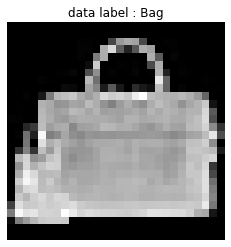

In [13]:
def view_input_img(data, idx, label_map, cmap='gray'):
  plt.imshow(data.data[idx], cmap=cmap)
  plt.title(f"data label : {label_map[data.targets[idx].item()]}")
  plt.axis("off")

view_input_img(train_data, 1010, converted_label_map)

### Now let's create the dataloader , to load the data and pass it to training algorithm batch by batch

In [14]:
training_data_loader=DataLoader(
    dataset=train_data,
    batch_size=config.BATCH_SIZE,
    shuffle=True
)

test_data_loader=DataLoader(
    dataset=test_data,
    batch_size=config.BATCH_SIZE,
    shuffle=False     ## generally we don't shuffle the test data, but its upto us, if we want we can do that.
)

In [15]:
## Let's see what each dataloader(test vs train) will contain
for imgs, labels in  training_data_loader:
  print(imgs.shape)
  print(labels.shape)
  break

## This will show that each training batch has [32, 1, 28, 28], Here-
# 32= number of images
# 1= only gray scale no RGB
# 28,28= 28 x 28 matrix present
# and since we have 32 images so we will have 32 labels for them as well.

torch.Size([32, 1, 28, 28])
torch.Size([32])


 couldn't display the image because of : Invalid shape (1, 28, 28) for image data


Displaying image with the help of squeeze



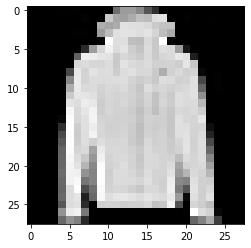

In [16]:
## Now if we want we can't plot imgs[0] because its shape is (1,28,28) and plotlib only takes 28,28 to plot. So in this case we will try to 
## to squeeze the size of the imgs using squeeze().
try:
  plt.imshow(imgs[0])
except Exception as e:
  print(f" couldn't display the image because of : {e}")

print("\n\nDisplaying image with the help of squeeze\n")
## Let's convert the image now using squeeze
plt.imshow(imgs[0].squeeze(), cmap='gray')

In [17]:
## Let's see how squeeze helps us here

print("Image size without squeeze() ", imgs[0].shape)
print("Image size with squeeze() ", imgs[0].squeeze().shape)
print("Image size with unsqueeze() ", imgs[0].unsqueeze(dim=1).shape)

Image size without squeeze()  torch.Size([1, 28, 28])
Image size with squeeze()  torch.Size([28, 28])
Image size with unsqueeze()  torch.Size([1, 1, 28, 28])


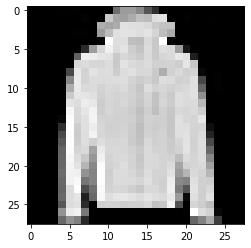

In [18]:
## We can also convert the image into numpy data from torch tensor

numpy_data=imgs[0].squeeze().numpy()
numpy_data
## ploting the numpy image
plt.imshow(numpy_data, cmap='gray')

In [19]:
## Let's create the structure of our model here
class CNN(nn.Module):    ## It is extending Module class from nn
  def __init__(self,in_, out_):
    super(CNN, self).__init__()

    self.conv_pool_01= nn.Sequential(
        nn.Conv2d(in_channels=in_, out_channels=8, kernel_size=5, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.conv_pool_02= nn.Sequential(
        nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.Flatten=nn.Flatten()
    self.FC_01=nn.Linear(in_features=16*4*4, out_features=128)
    self.FC_02=nn.Linear(in_features=128, out_features=64)
    self.FC_03=nn.Linear(in_features=64, out_features=out_)

  def forward(self,x):
    x=self.conv_pool_01(x)
    x=self.conv_pool_02(x)
    x=self.Flatten(x)
    x=self.FC_01(x)
    x=f.relu(x)
    x=self.FC_02(x)
    x=f.relu(x)
    x=self.FC_03(x)
    
    return x



In [20]:
model=CNN(1,10)
print(model)

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)


In [21]:
model.conv_pool_02

Sequential(
  (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [22]:
model.forward

<bound method CNN.forward of CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)>

In [23]:
## By default it is not runnning on CUDA
next(model.parameters()).is_cuda

False

In [24]:
model.to(config.DEVICE)   ## calling config functions device variable to decide on device

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)

In [25]:
## Now it will be running on CUDA/GPU
next(model.parameters()).is_cuda

True

## Count the number of trainable paramters

In [26]:
def count_params(model):
  model_params= {"Modules":list(), "Parameters":list()}
  total={"trainable":0, "non-trainable":0}

  for name, parameters in model.named_parameters():
    param = parameters.numel()

    if not parameters.requires_grad:
      total['non-trainable'] += param
      continue
    model_params["Modules"].append(name)
    model_params["Parameters"].append(param)
    total["trainable"] += param

  df=pd.DataFrame(model_params)
  df=df.style.set_caption(f" total parameters of the model : {total}")
  return df

count_params(model)

,Modules,Parameters
0,conv_pool_01.0.weight,200
1,conv_pool_01.0.bias,8
2,conv_pool_02.0.weight,3200
3,conv_pool_02.0.bias,16
4,FC_01.weight,32768
5,FC_01.bias,128
6,FC_02.weight,8192
7,FC_02.bias,64
8,FC_03.weight,640
9,FC_03.bias,10


## Training 

In [27]:
## We have 60000 training images and our batch size is 32 so
60000/32
# which is equal to 1875, which means we should have 1875 steps per epoch.

1875.0

In [28]:
criterion = nn.CrossEntropyLoss()   ## defining our loss function
optimizer = torch.optim.Adam(model.parameters(), lr = config.LEARNING_RATE)

In [29]:
len(training_data_loader)       ## Steps per epoch

1875

In [30]:
for epoch in range(config.EPOCH):
  with tqdm(training_data_loader) as tqdm_epoch:
    for images, labels in tqdm_epoch:
      tqdm_epoch.set_description(f"Epoch {epoch+1}/{config.EPOCH}")

      ## Put the images on the gpu memory
      images = images.to(config.DEVICE)
      labels = labels.to(config.DEVICE)

      ##FORWARD PASS
      outputs = model(images)
      loss = criterion(outputs, labels)    ## as convention people write loss as criterion()

      ## backward pass
      optimizer.zero_grad()  ## we zero the gradient, so that it should not store any residual
      loss.backward()       ## calculating the gradients of weights
      optimizer.step()   ## Updating the weights


      tqdm_epoch.set_postfix(loss = loss.item())    ## We do loss.item() because loss is a tensor element, in order to print the value of loss we have to call .item()

Epoch 10/10: 100%|██████████| 1875/1875 [00:34<00:00, 54.72it/s, loss=0.386]


### Saving the model

In [31]:
os.makedirs("model_dir", exist_ok=True)
model_file_path = os.path.join("model_dir","CNN_Pytorch_Fashionmnist.pth")
torch.save(model,model_file_path)

### Loading the model

In [32]:
loaded_model = torch.load(model_file_path)
loaded_model.parameters

<bound method Module.parameters of CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)>

### Evaluating the model

In [33]:
pred = np.array([])
target = np.array([])

with torch.no_grad():    ## because we are only doing forward pass to predict and not backward pass, hence no need of gradient calculation
  for batch, data in enumerate(test_data_loader): # Since, enumerator returns the index and data. Hence, here index is the batch and data contains labels and images
    images = data[0].to(config.DEVICE)     # converting the images for GPU
    labels = data[1].to(config.DEVICE)

    y_pred = loaded_model(images)

    pred = np.concatenate((pred, torch.argmax(y_pred,1).cpu().numpy()))   ## we selected the probability of the highest class prediction using argmax, converted it into cpu as pred is a numpy array and then converted it into numpy()
    target = np.concatenate((target, labels.cpu().numpy()))



In [34]:
batch

312

In [35]:
## Let's print the confusion matrix
cm = confusion_matrix(target, pred)
cm

array([[828,   1,  13,  24,   8,   1, 109,   0,  16,   0],
       [  3, 954,   3,  30,   5,   0,   4,   0,   1,   0],
       [ 17,   3, 708,   9, 162,   0,  98,   0,   3,   0],
       [ 25,   3,  11, 833,  85,   0,  41,   0,   2,   0],
       [  1,   0,  76,  13, 791,   1, 117,   0,   1,   0],
       [  0,   0,   0,   0,   0, 950,   1,  35,   1,  13],
       [210,   0, 104,  29,  83,   1, 556,   0,  17,   0],
       [  0,   0,   0,   0,   0,  13,   0, 964,   2,  21],
       [  2,   2,   5,   3,  16,   4,  13,   3, 952,   0],
       [  0,   0,   1,   0,   0,   8,   2,  37,   2, 950]])

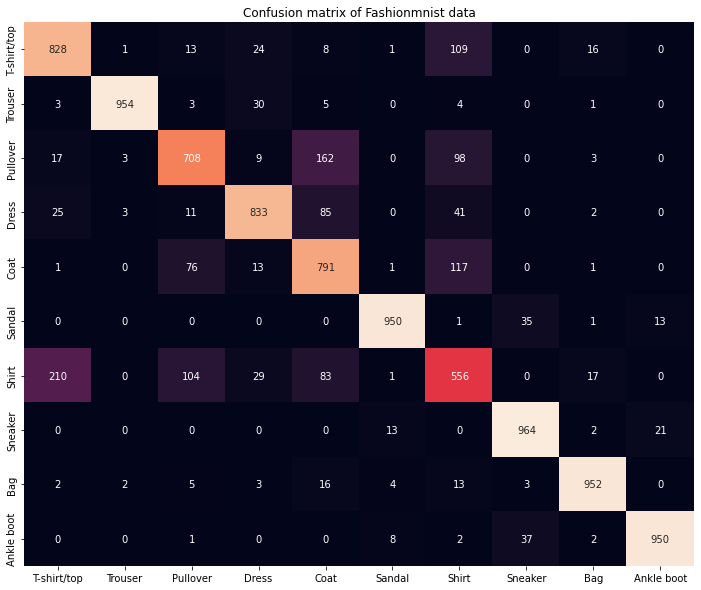

In [36]:
## Let's plot the confusion matrix
plt.figure(figsize=(12,10))
plt.title("Confusion matrix of Fashionmnist data")
sns.heatmap(cm, annot = True,fmt='d', xticklabels=converted_label_map.values(), yticklabels=converted_label_map.values(), cbar = False)
# 

In [38]:
## checking the accuracy score
accuracy_score(target, pred)

0.8486

### Making our own predictions

In [40]:
data = next(iter(test_data_loader))    #As equvilent to writing--->  i[0] for i in test_data_loader
data     ## It has two items, one is image matrix and other is labels

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

In [42]:
len(data)   ### It has two items, one is image matrix and other is labels

2

In [44]:
images, label = data
images.shape    ## Since, we have 32 images in one batch

torch.Size([32, 1, 28, 28])

In [45]:
label.shape

torch.Size([32])

In [64]:
## Let;s display any of the random image 
img = images[3]
img

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0824, 0.4824, 0.4235, 0.3882, 0.3882, 0.3294, 0.3255,
          0.3373, 0.3608, 0.2745, 0.0235, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.4157, 0.9725, 0.9020, 0.8039, 0.9373, 0.8314, 0.6824,
          0.8431, 0.8118, 0.5451, 0.3647, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.4980, 0.8471, 0.8353, 0.8039, 0.8392, 0.8392, 0.7569,
          0.8980, 0.7882, 0.6471, 0.3882, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.5725, 0.7647, 0.8980, 0.8314, 0.8941, 0.8431, 0.8196,
          0.9020, 0.8392, 0.6431, 0.2118, 0.0000, 0.0000,

torch.Size([28, 28])


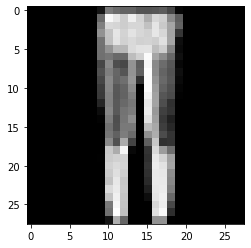

In [65]:
## We will require to squeeze the image here as it has rgb channel value as well and matplotlib doesn't recognize that
print(img.squeeze().shape)
plt.imshow(img.squeeze(), cmap = "gray")

In [50]:
## Now let's retrieve the label value of the above image
cloth_type = label[3]
cloth_type

tensor(1)

#### cloth_type has returned one but in tensor format so we have to use .item() to get the numeric value

In [51]:
cloth_type.item()

1

#### Now cloth_type has returned us the number but we don't know what does the 1 indicate, so we will retrieve it from the converted_label_map

In [53]:
converted_label_map[cloth_type.item()]

'Trouser'

In [66]:
## In order to pass image to the model for the prediction, we need to unsqueeze it and add batch to it and then convert it into the cuda as our model is built on cuda and only works on cuda
img.unsqueeze(dim=1).shape

torch.Size([1, 1, 28, 28])

In [69]:
logit = model(img.unsqueeze(dim=1).to(config.DEVICE))
logit

tensor([[   1.1486,   15.8646,   -4.6792,    1.2059,    2.6057,  -19.1494,
           -2.5345, -168.9294,  -25.0900,  -17.0688]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [73]:
## If we sum all the values retured by our model which is stored in logit named tensor, we will see that sum is not equal to 1.
sum( [1.1486,   15.8646,   -4.6792,    1.2059,    2.6057,  -19.1494,
           -2.5345, -168.9294,  -25.0900,  -17.0688])

## So we have to convert these values from the activation function which we used in the last layer or our CNN, and as we know the last layer for classification is softmax

-216.6265

In [74]:
pred_prob = f.softmax(logit, dim =1)
pred_prob

tensor([[4.0634e-07, 1.0000e+00, 1.1965e-09, 4.3033e-07, 1.7447e-06, 6.2172e-16,
         1.0218e-08, 0.0000e+00, 1.6353e-18, 4.9796e-15]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)

In [75]:
## Now let's do the sum and we will find that it is equal to one which was our label.
sum([4.0634e-07, 1.0000e+00, 1.1965e-09, 4.3033e-07, 1.7447e-06, 6.2172e-16,
         1.0218e-08, 0.0000e+00, 1.6353e-18, 4.9796e-15])

1.0000025927845058

In [76]:
## Finding the maximum probablity of which label
max_prob = torch.argmax(pred_prob).item()
max_prob

1

In [78]:
## passing the label value into the label dictionary
converted_label_map[max_prob]

'Trouser'

## Let's create a function to predict the labels when images provided to the model

In [86]:
def predict(data, model,device,label_map,index=0):
  images, labels = data
  img = images[index]
  label = labels[index]

  plt.imshow(img.squeeze(), cmap='gray')
  logit = model(img.unsqueeze(dim = 1).to(device))
  pred_prob = f.softmax(logit, dim=1)
  max_prob = torch.argmax(pred_prob).item()

  predicted_label = label_map[max_prob]
  actual_label = label_map[label.item()]


  plt.title(f"Actual label = {actual_label}, Predicted label = {predicted_label}")
  plt.show()

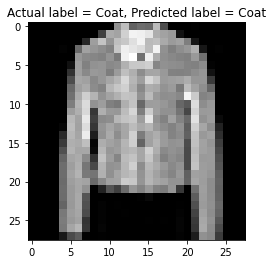

In [89]:
predict(data,model,config.DEVICE, converted_label_map, index = 10)

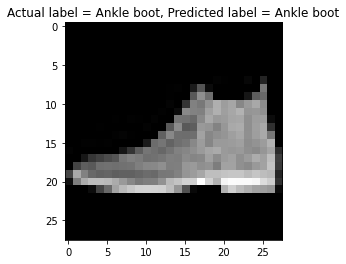

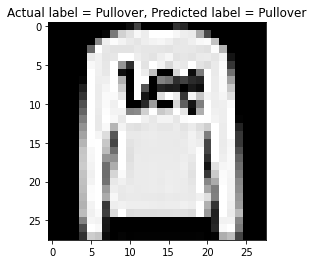

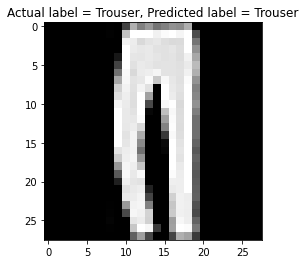

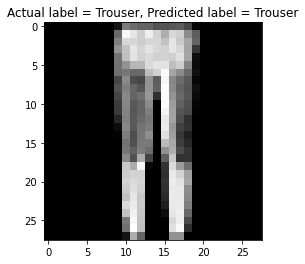

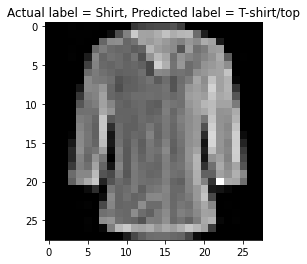

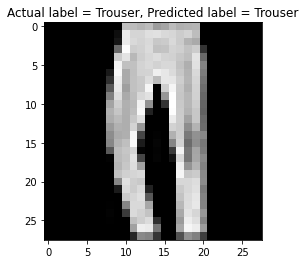

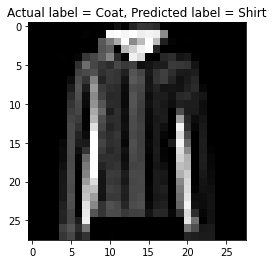

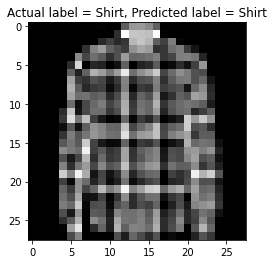

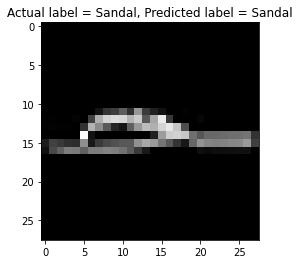

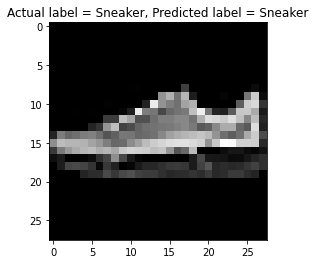

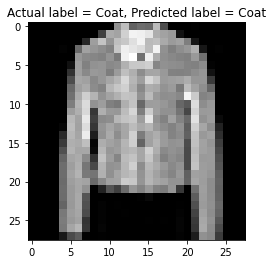

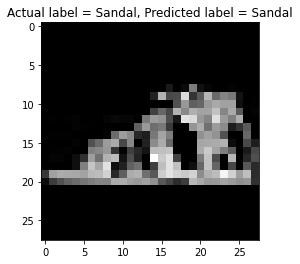

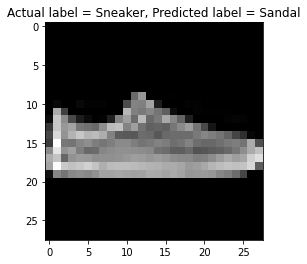

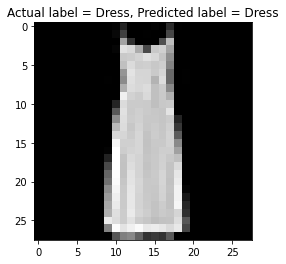

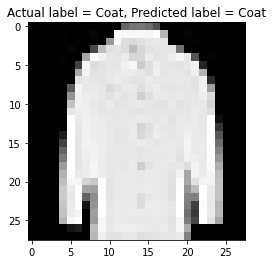

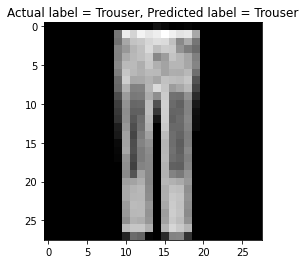

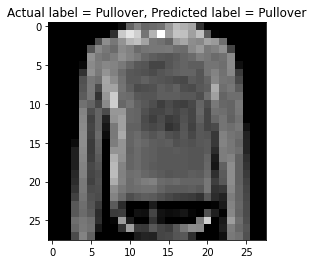

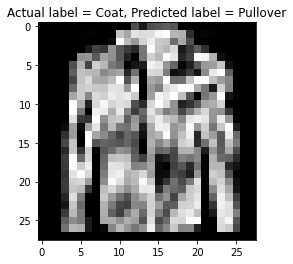

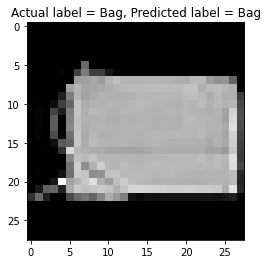

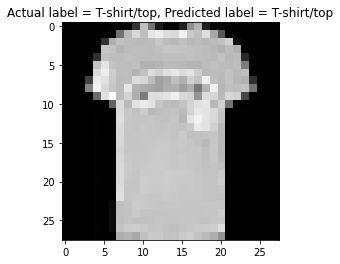

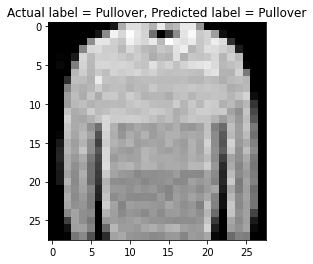

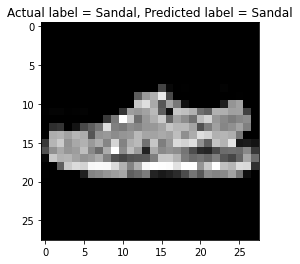

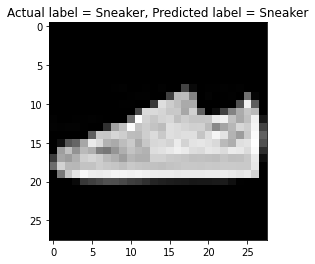

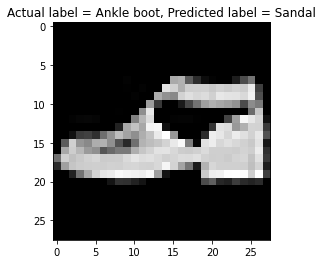

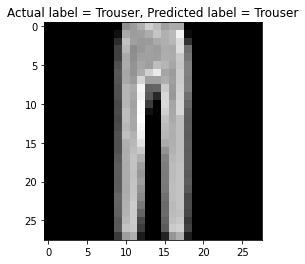

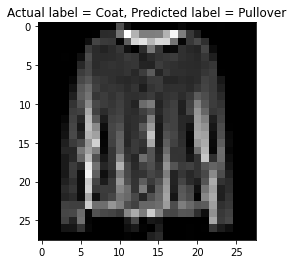

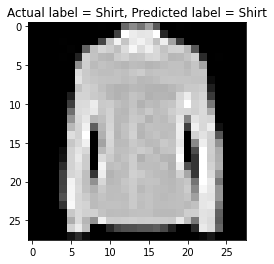

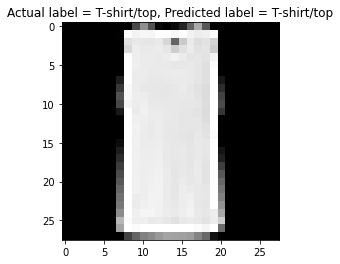

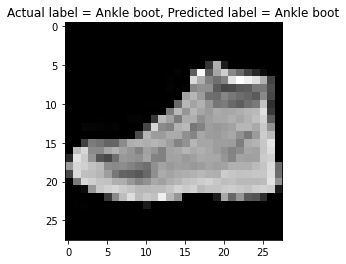

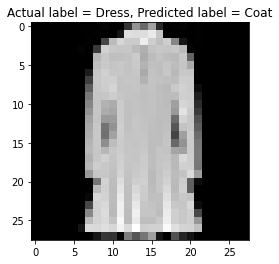

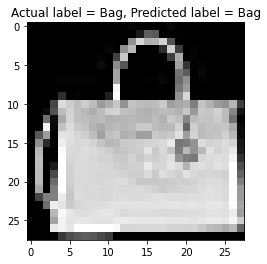

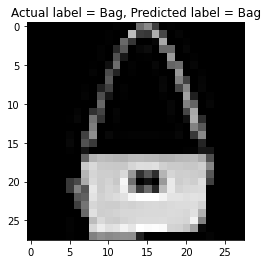

In [91]:
for i in range(32):
  predict(data,model,config.DEVICE, converted_label_map, index = i)